# run a set of parameters through the SMFF model

In [1]:
import os, socket
import numpy as np

## the parameters

In [2]:
# output
PNAME = 'p_9'
outpath = os.path.join(os.getcwd(), PNAME)
os.makedirs(outpath)

# model init parameters
components = ((2, 3, 40),(8, 2, 20),)  # (num components, sigma gaussian, window size multiplier,)
spl0_comps_init = 0.85
init_its = 5

# smff parameters
spl0_comps_smff = 0.8
iterations = 3
morph_mod = 2

## running the code

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (5,5)

In [4]:
import neuralyzer
from neuralyzer.im.smff import model, _init_model, nbutils

[ 2015-07-17 00:46:10 ] [ log ] [ INFO ] : NEURALYZER LOGGER CREATED
[ 2015-07-17 00:46:10 ] [ log ] [ DEBUG ] : stdoutloglevel: DEBUG


In [5]:
# load data
if socket.gethostname() == 'kumo':
    datapath = os.path.normpath('/home/michael/datac/140316/data5/data2/')
else:
    datapath = os.path.normpath('/Users/michael/coding/RIKEN/data/150612/')
    
datafile = os.path.join(datapath, 'Image001_Registered_16bit_cutout.tif')

data = neuralyzer.get_data(datafile, library='tifffile')

[ 2015-07-17 00:46:11 ] [ data_handler ] [ DEBUG ] : root_path set to /Users/michael/coding/RIKEN/lib/neuralyzer/notebooks/dev
[ 2015-07-17 00:46:12 ] [ data_handler ] [ DEBUG ] : loaded data from cache file: /Users/michael/coding/RIKEN/data/150612/Image001_Registered_16bit_cutout.tif.hdf5


In [6]:
ds = data.shape
data = data.reshape((data.shape[0], data.shape[1]*data.shape[2])).T
data.shape

(65536, 3000)

In [7]:
ncomps = 0
for nc in components: ncomps+=nc[0]

In [8]:
A, C, b, f = _init_model._init_model(data, components=components, spl0_comps=spl0_comps_init, spl0_bg=0.0001, iterations=init_its)

[ 2015-07-16 22:02:08 ] [ _init_model ] [ INFO ] : Initializing SMFF model
[ 2015-07-16 22:05:52 ] [ _init_model ] [ INFO ] : Finding 2 components with sigma 3 and window size 121
[ 2015-07-16 22:08:00 ] [ _init_model ] [ INFO ] : Finding 8 components with sigma 2 and window size 41
[ 2015-07-16 22:12:00 ] [ _init_model ] [ INFO ] : Finally calculating background ..
[ 2015-07-16 22:15:15 ] [ _init_model ] [ INFO ] : A, C, b and f intitialized.


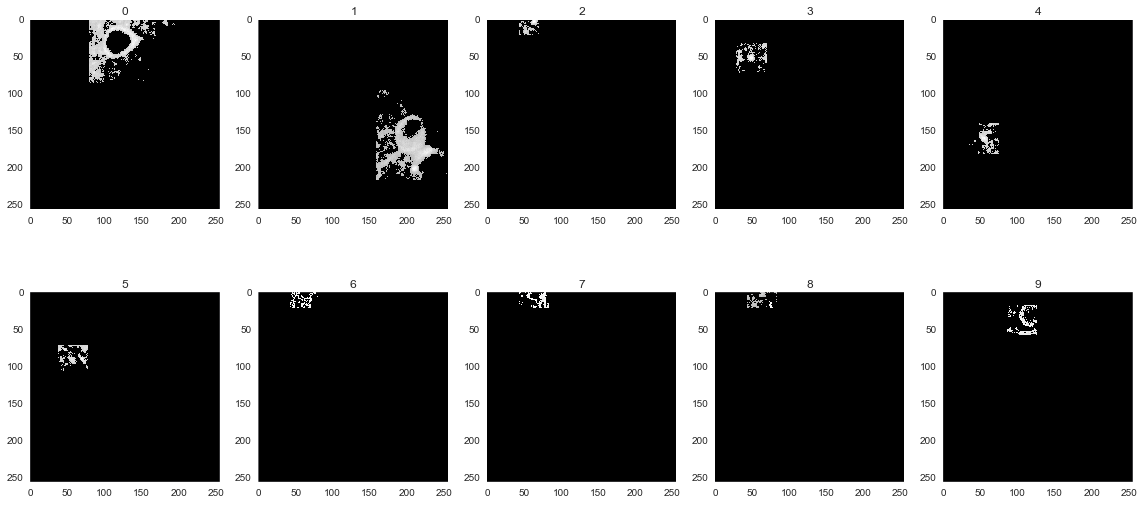

In [9]:
fig, ax = nbutils.plot_spatial_components(A)
fig.savefig(os.path.join(outpath, 'init_spatial_components.png'))

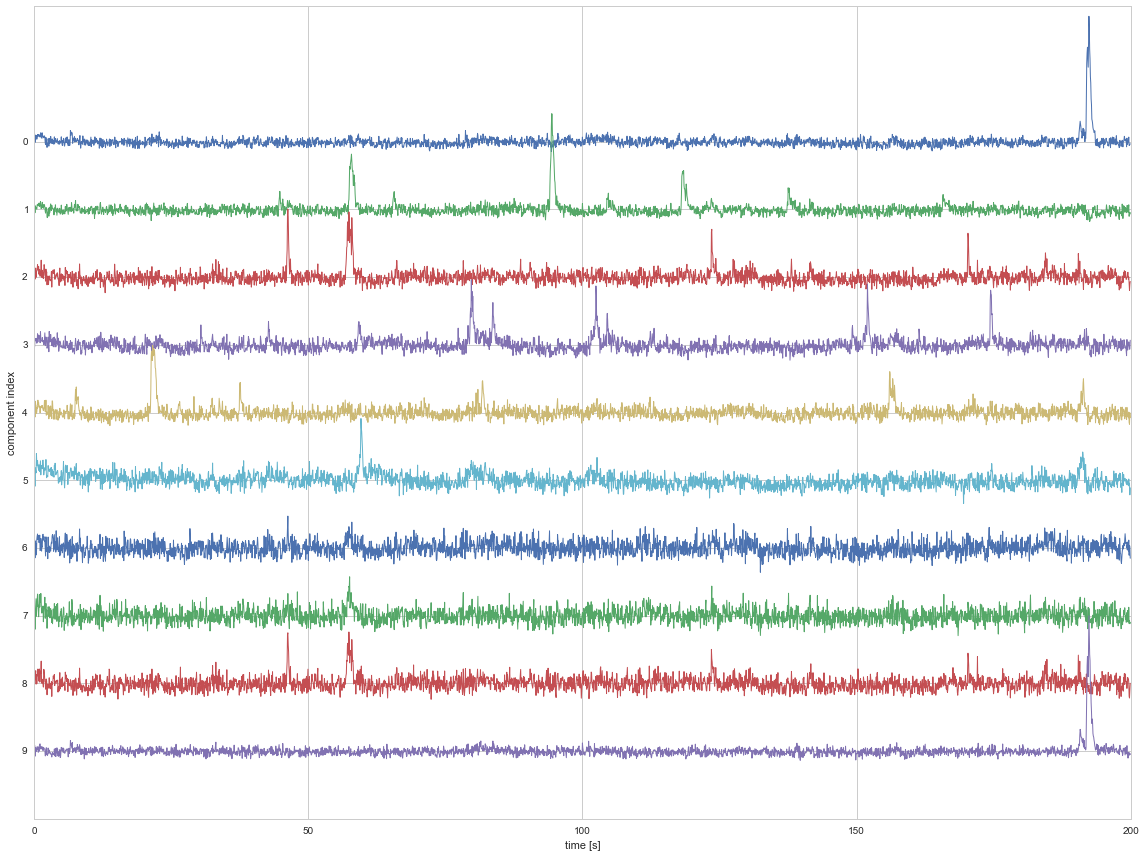

In [10]:
fig, ax = nbutils.plot_temporal_components(C, 15.)
fig.savefig(os.path.join(outpath, 'init_temporal_components.png'))

In [14]:
reload(model)

<module 'neuralyzer.im.smff.model' from '/Users/michael/coding/RIKEN/lib/neuralyzer/neuralyzer/im/smff/model.py'>

In [11]:
smf_morph = model.SMFF(A=A, C=C, b=b, f=f)
smf_morph.fit_model(data, spl0=spl0_comps_smff, re_init=True, morph_mod=morph_mod, max_num_iterations=iterations)

[ 2015-07-16 22:15:18 ] [ model ] [ INFO ] : Fitting SMFF to data Y.
[ 2015-07-16 22:15:18 ] [ model ] [ DEBUG ] : [Y] = (65536, 3000)
[ 2015-07-16 22:15:41 ] [ model ] [ INFO ] : avg absolute residual = 14429.5133457 
[ 2015-07-16 22:15:41 ] [ model ] [ INFO ] : iteration 1 / 3 
[ 2015-07-16 22:15:41 ] [ model ] [ DEBUG ] : Updating A and b with spl0=0.8
[ 2015-07-16 22:18:37 ] [ model ] [ DEBUG ] : Updating C and f with method "projgrad".
[ 2015-07-16 22:18:49 ] [ model ] [ INFO ] : avg absolute residual = 4800.35211227 
[ 2015-07-16 22:18:49 ] [ model ] [ INFO ] : iteration 2 / 3 
[ 2015-07-16 22:18:49 ] [ model ] [ DEBUG ] : Updating A and b with spl0=0.8
[ 2015-07-16 22:21:05 ] [ model ] [ INFO ] : morphologically closing spatial components.
[ 2015-07-16 22:21:05 ] [ model ] [ DEBUG ] : Updating C and f with method "projgrad".
[ 2015-07-16 22:21:17 ] [ model ] [ INFO ] : avg absolute residual = 4819.04043838 
[ 2015-07-16 22:21:17 ] [ model ] [ INFO ] : iteration 3 / 3 
[ 2015-07-

/Users/michael/coding/RIKEN/lib/scikit-learn/sklearn/decomposition/nmf.py:252: UserWarning: Iteration limit reached in nls subproblem.
  warnings.warn("Iteration limit reached in nls subproblem.")


In [24]:
smf_morph = model.SMFF()
smf_morph.init_model(random=True, k=10, d=data.shape[0], T=data.shape[1])
smf_morph.fit_model(data, spl0=0.7, re_init=True, morph_mod=morph_mod, max_num_iterations=8)

[ 2015-07-17 01:09:48 ] [ model ] [ INFO ] : Fitting SMFF to data Y.
[ 2015-07-17 01:09:48 ] [ model ] [ DEBUG ] : [Y] = (65536, 3000)
[ 2015-07-17 01:09:59 ] [ model ] [ INFO ] : avg absolute residual = 16687.7806827 
[ 2015-07-17 01:09:59 ] [ model ] [ INFO ] : iteration 1 / 8 
[ 2015-07-17 01:09:59 ] [ model ] [ DEBUG ] : Updating A and b with spl0=0.7
[ 2015-07-17 01:13:36 ] [ model ] [ DEBUG ] : Updating C and f with method "projgrad".
[ 2015-07-17 01:13:48 ] [ model ] [ INFO ] : avg absolute residual = 4805.90967859 
[ 2015-07-17 01:13:48 ] [ model ] [ INFO ] : iteration 2 / 8 
[ 2015-07-17 01:13:48 ] [ model ] [ DEBUG ] : Updating A and b with spl0=0.7
[ 2015-07-17 01:16:31 ] [ model ] [ INFO ] : morphologically closing spatial components.
[ 2015-07-17 01:16:31 ] [ model ] [ DEBUG ] : Updating C and f with method "projgrad".
[ 2015-07-17 01:16:48 ] [ model ] [ INFO ] : avg absolute residual = 4971.38306646 
[ 2015-07-17 01:16:48 ] [ model ] [ INFO ] : iteration 3 / 8 
[ 2015-07-

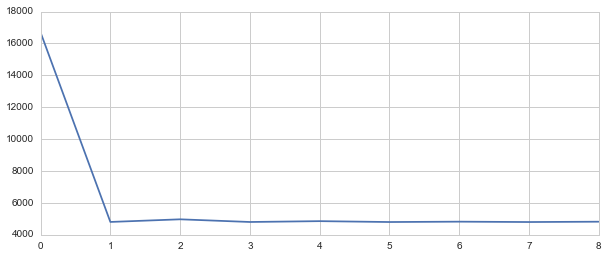

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(smf_morph._avg_abs_res)
fig.savefig(os.path.join(outpath, 'residuals.png'))

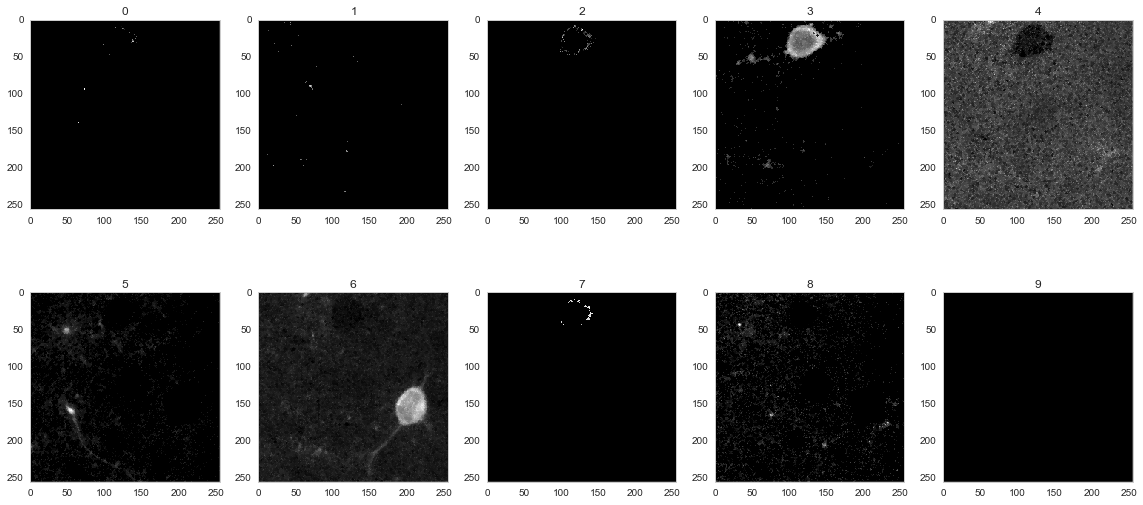

In [26]:
fig, ax = nbutils.plot_spatial_components(smf_morph.A)
fig.savefig(os.path.join(outpath, 'spatial_components.png'))

(110, 140)

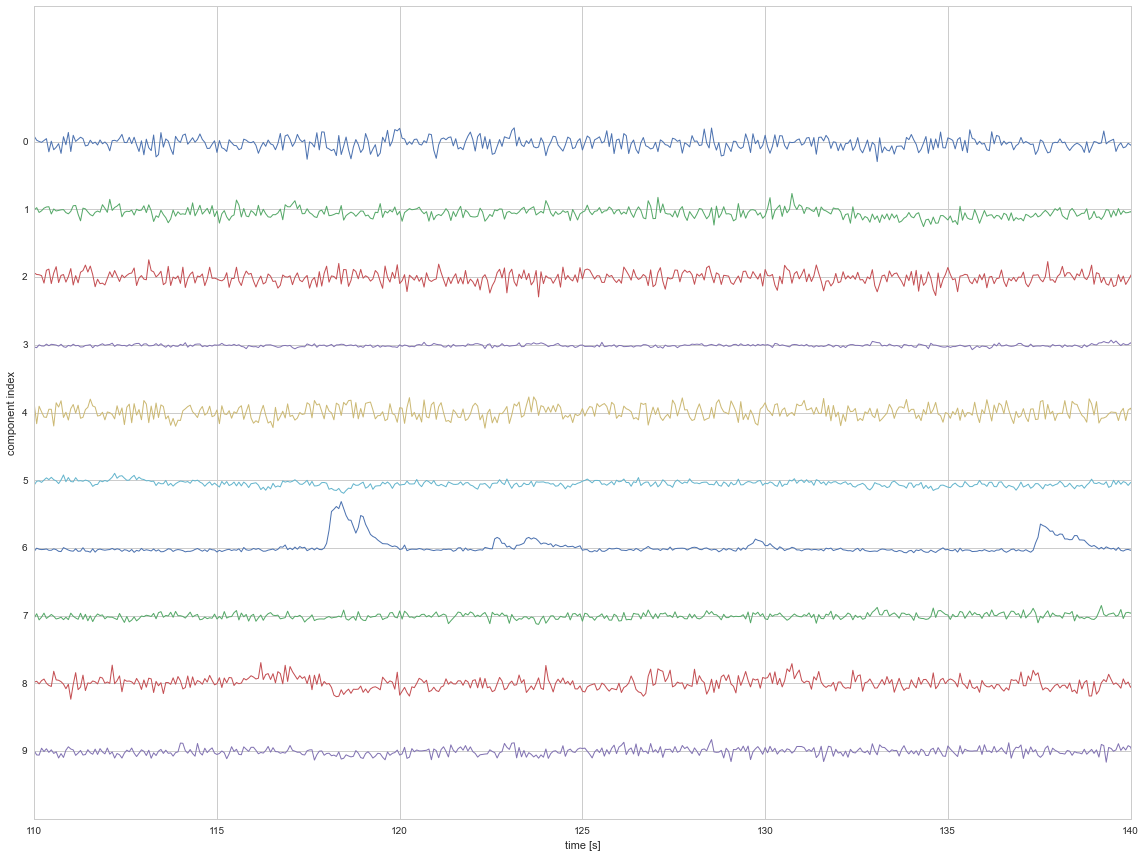

In [34]:
fig, ax = nbutils.plot_temporal_components(smf_morph.C, 15.)
ax.set_xlim([110, 140])
#fig.savefig(os.path.join(outpath, 'temporal_components.png'))

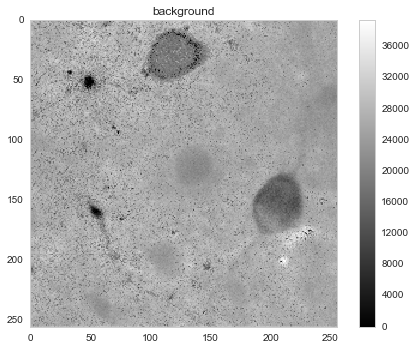

In [28]:
fig, ax = plt.subplots(ncols=1,nrows=1)
ax.grid(False)
imp = ax.imshow(smf_morph.b.reshape(256,256),cmap='gray', vmin=0)
ax.set_title('background')
plt.colorbar(imp)
fig.savefig(os.path.join(outpath, 'background.png'))

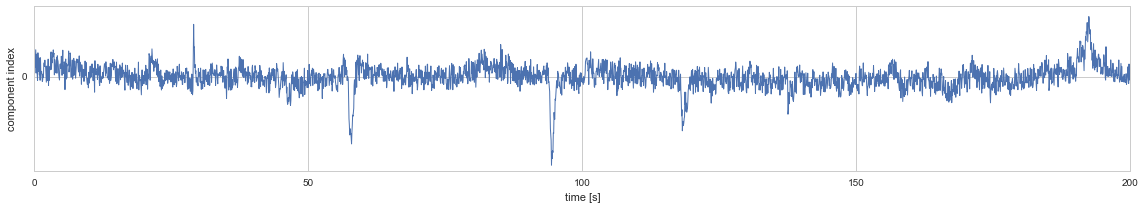

In [29]:
fig, ax = nbutils.plot_temporal_components(smf_morph.f, 15.)
fig.savefig(os.path.join(outpath, 'background_trace.png'))

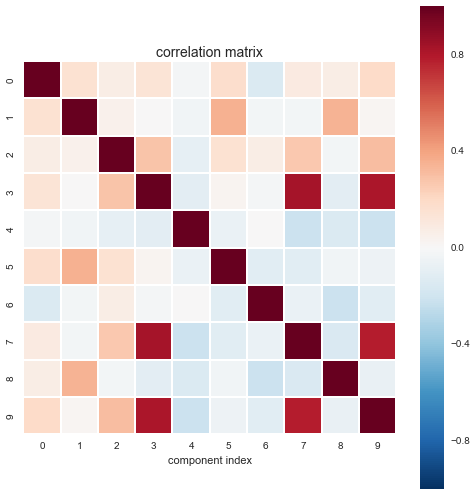

In [30]:
fig, ax = nbutils.plot_correlation_matrix(smf_morph.C)
fig.savefig(os.path.join(outpath, 'correlation_matrix.png'))

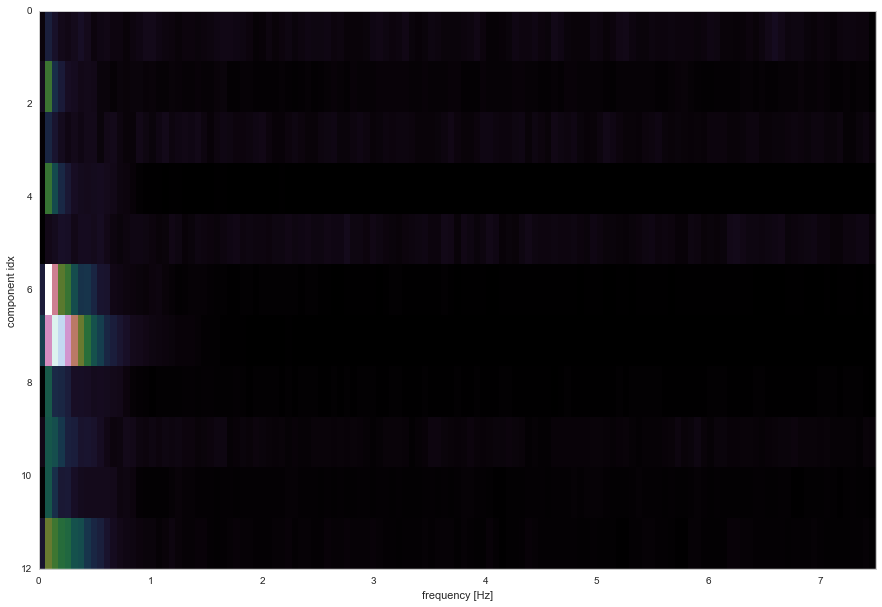

In [31]:
fig, ax = nbutils.plot_spectral_components(smf_morph.C, smf_morph.f)
fig.savefig(os.path.join(outpath,'spectral_components.png'))